## Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import h5py

In [7]:
FS = 50e3
fs = FS # SAMPLING FREQUENCY

In [42]:
class H5Dataset:
    '''
    Class for open dataset in HDF5 format.

    Parameters:
    -----------
    h5dataset: h5py._hl.files.File,
        is the HDF5 dataset file.
    segment_size: int,
        is the size of segments we are using.

    Attributes:
    -----------   
    ds_parts: list[str],
        list of dataset parts, for instance 
        [x_train_1,x_train_2,x_test_1,x_test_2]
    
    Example:
    --------
        hdf5_file_path = 'dataset_.hdf5'
        dataset = h5py.File(hdf5_file_path, 'r')
        ds = H5Dataset(dataset, segment_size=int(10e3))
        ds.inspect()
        # >> Name x_test_1,  Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
        # >> Name x_test_2,  Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
        # >> Name x_train_1, Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
        # >> Name x_train_2, Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250

        range_ = ds.get_range('x_test_1')
        print(range_.shape)
        # >>  (20, 12500000) # Get all time series form the part 

        range_ = ds.get_range('x_test_1',(0,2)) # Get specific time series form the part 
        print(range_.shape)
        # >> (2, 12500000)

        source_no = 0 # Source Number
        x_,y_ = ds.get_source('x_test_1',0) # Get time series from specific source 
                                            # divided by segments 
                                            # and corresponding source number.
        print(x_.shape, y_.shape)
        # >> (1250, 10000) (1250,)

        # example of plot source
        segment_no = 0
        plt.figure(figsize = (4,2), dpi = 125)
        plt.plot(x_[segment_no],'k'); 
        plt.title(f'segment № {segment_no} of source № {source_no}', fontsize = 18); 
        plt.xlabel('n, (points)', fontsize = 18)
        plt.ylabel('Amplitude (A)', fontsize = 18)
        plt.show()    

    '''
    def __init__(self, h5dataset, segment_size = 1):
        self.dataset  = h5dataset
        self.ds_parts = list(self.dataset.keys())
        self.seg_size = int(segment_size)
    #---------------------------------    
    def visit(self):
        ''' visit method for HDF5 file.'''
        self.dataset.visit(lambda name: print(name))
    #---------------------------------
    def inspect(self):
        ''' Information about content in the hdf5 file.'''
        for key in self.ds_parts:
            part = self.dataset[key]
            info = f'Name {key},\tType {type(part)}'
            info +=f' Shape {part.shape}, DType {part.dtype}'
            if isinstance(self.seg_size,int):
                info +=f' N segments {part.shape[1]//self.seg_size}'    
            print(info)
    #---------------------------------
    def get_source(self, part, source, label = None):
        '''
        Get source as time series for selected part and source number.
        
        Parameters:
        -----------
        part:   str, part name
        source: int, source number
        label:  int, label (class) of source
        
        Returns:
        ---------
        segment: 2d ndarray, time serices divided into segments
        target:  1d ndarray, class label for each  segment
        '''
        if self.seg_size is None: raise ValueError
        
        source_data = self.dataset[part][source]
        
        segment = source_data.reshape(-1,self.seg_size)
        
        if label is None:
            label = source
        target  = label * np.ones(segment.shape[0])
        return segment, target
    
    #---------------------------------
    def part(self, part_name):
        ''' return part of File by the part name'''
        return self.dataset[part_name]
    
    #---------------------------------    
    def get_range(self, part, sources = None, label = None):
        ''' 
        Get full segemnts of HDF file data,
        
        Parameters:
        -----------
        part:     str, part name
        source:   int, source number
        label:    int, label (class) of source
        
        Returns:
        ---------
        segment: 2d ndarray, time serices divided into segments
        target:  1d ndarray, class label for each  segment
        
        '''
        if self.seg_size is None: raise ValueError
        
        data = self.dataset[part]
        if sources is None:  sources  = (0,data.shape[0])
        
        segments = (0,data.shape[1]//self.seg_size) 
        
        sources  = (max(0,int(sources[0])),min(data.shape[0],int(sources[1])))    
        segments = (segments[0]*self.seg_size,segments[1]*self.seg_size)  
        segments = (max(0,int(segments[0])),min(data.shape[1],int(segments[1])))

        return data[sources[0]:sources[1],segments[0]:segments[1] ]
        
    

Name x_test_1,	Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
Name x_test_2,	Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
Name x_train_1,	Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
Name x_train_2,	Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
(20, 12500000)
(2, 12500000)
(1250, 10000) (1250,)


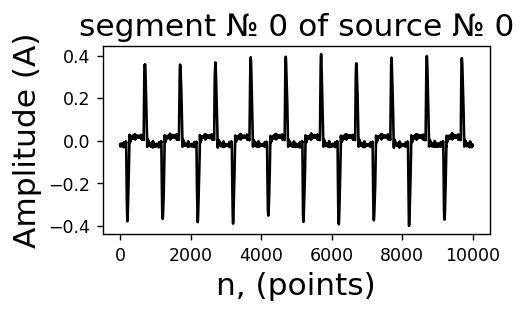

In [43]:
hdf5_file_path = 'dataset_.hdf5'
dataset = h5py.File(hdf5_file_path, 'r')
ds = H5Dataset(dataset, segment_size=int(10e3))
ds.inspect()
# >> Name x_test_1,  Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
# >> Name x_test_2,  Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
# >> Name x_train_1, Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250
# >> Name x_train_2, Type <class 'h5py._hl.dataset.Dataset'> Shape (20, 12500000), DType float32 N segments 1250

range_ = ds.get_range('x_test_1')
print(range_.shape)
# >>  (20, 12500000) # Get all time series form the part 

range_ = ds.get_range('x_test_1',(0,2)) # Get specific time series form the part 
print(range_.shape)
# >> (2, 12500000)

source_no = 0 # Source Number
x_,y_ = ds.get_source('x_test_1',0) # Get time series from specific source 
                                    # divided by segments 
                                    # and corresponding source number.
print(x_.shape, y_.shape)
# >> (1250, 10000) (1250,)

# example of plot source
segment_no = 0
plt.figure(figsize = (4,2), dpi = 125)
plt.plot(x_[segment_no],'k'); 
plt.title(f'segment № {segment_no} of source № {source_no}', fontsize = 18); 
plt.xlabel('n, (points)', fontsize = 18)
plt.ylabel('Amplitude (A)', fontsize = 18)
plt.show()

In [35]:
hdf5_file_path = 'dataset_.hdf5'
dataset = h5py.File(hdf5_file_path, 'r')

In [13]:
range_ = ds.get_range('x_test_1')
print(range_.shape)

(20, 12500000)


In [14]:
range_ = ds.get_range('x_test_1',(0,2))
print(range_.shape)

(2, 12500000)


we have period about 1000 points

In [26]:
source_no = 0
x_,y_ = ds.get_source('x_test_1',source_no)
print(x_.shape, y_.shape)

(1250, 10000) (1250,)


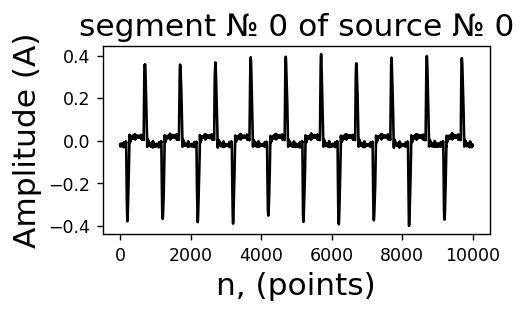

In [29]:
segment_no = 0
plt.figure(figsize = (4,2), dpi = 125)
plt.plot(x_[segment_no],'k'); 
plt.title(f'segment № {segment_no} of source № {source_no}', fontsize = 18); 
plt.xlabel('n, (points)', fontsize = 18)
plt.ylabel('Amplitude (A)', fontsize = 18)
plt.show()